In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

### 讀入 Fashion MNIST 數據集

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### 觀察資料

In [4]:
# y有10個類別，類別名稱依序如下：
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
print(len(x_train), len(x_test))

60000 10000


In [6]:
print(x_train[10070])
print(y_train[10070])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   4  20  20
   11   0   0  13   1   0   0   1   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0  76 162 159 156
  155 193 177 178 174 132 110 179  94   0]
 [  0   0   0   0   0   0   0   0   0   0   1   1   1   0 107 160 147 169
  177 192 175 176 170 175 159 166  92   0]
 [  0   0   0   0   0   0   0   0   0   1   2   0   0   0 102 14

This is Ankle boot.


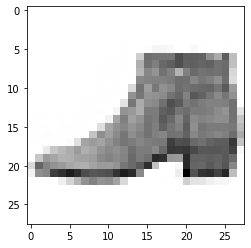

In [7]:
n = 10070
print("This is", class_names[y_train[n]] + ".")
plt.imshow(x_train[n], cmap = "Greys")

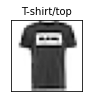

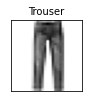

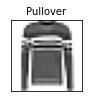

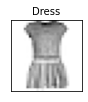

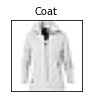

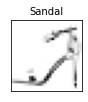

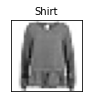

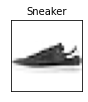

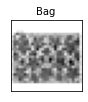

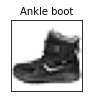

In [8]:
# 看一下每個種類長怎樣
for i in range(len(set(y_train.tolist()))):
    index = y_train.tolist().index(i)
    f = plt.figure(figsize=(15,15))
    ax = f.add_subplot(1,10,i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(class_names[y_train[index]], fontsize=10)
    plt.imshow(x_train[index], cmap='Greys')

### 資料處理
因為通常圖片有三原色：RGB，稱為三個channel。
但今我們的輸入為灰階，也就是只有一個 channel, 所以要將 (28, 28) --> (28, 28, 1)，告訴他我們只有一個channel，最後做標準化的動作。

In [9]:
# 標準化(normalization)，使值在0~1之間，可避免被資料scale拉走
x_train = x_train.reshape(60000, 28, 28, 1) / 255
x_test = x_test.reshape(10000, 28, 28, 1) / 255

接著針對 y 做 one hot encoding，一共分為10類。

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
# 輸出變成10維行向量。
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### 讀入必要函式

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD

### Step 1. 打造函數學習機 (CNN)

In [13]:
model = Sequential()

一樣依照慣例，做三層的Convolution + Maximum Pooling。

三層的 Filter 數量設定分別為16, 32, 64，Filter 的大小設定為 5 * 5，padding設定為same，activation function一樣使用relu來做。
MaxPooling大小為2 * 2。

In [14]:
model.add(Conv2D(16, (5, 5), padding = "same", 
                 input_shape = (28, 28, 1), 
                 activation = "relu"))

In [15]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [16]:
model.add(Conv2D(32, (5, 5), padding = "same", activation = "relu"))

In [17]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [18]:
model.add(Conv2D(64, (5, 5), padding = "same", activation = "relu"))

In [19]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [20]:
# 把最後64張記分板拉平，以便後面進入全連結神經網路！
model.add(Flatten())

In [21]:
# 接著設定Dense，神經元設99個，激發函數一樣用relu，隱藏層一層。
model.add(Dense(99, activation = "relu"))

In [22]:
# 最後輸出十維向量，softmax表和為1。
model.add(Dense(10, activation = "softmax"))

### Summarize 建造的神經網路

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0

計算 CNN 參數量

In [24]:
# conv2d
(5 * 5 + 1) * 16

416

In [26]:
# conv2d_1
(5 * 5 * 16 + 1) * 32

12832

In [27]:
# conv2d_2
(5 * 5 * 32 + 1) * 64

51264

In [28]:
# 拉平之後，維度大小的由來：
3 * 3 * 64

576

最後的模型組裝，其中：Loss Function改用categorical_crossentropy，主要是因為正在處理分多類的問題，因此選用分類交叉熵函數作為損失函數；學習率設定為0.05。

In [29]:
model.compile(loss = "categorical_crossentropy", optimizer = SGD(lr = 0.05), metrics = ["accuracy"])

### Step 2. Fit

In [30]:
# batch_size：每次看了多少題之後，就要開始調參數。
# epochs：總共60,000筆資料，一共要訓練幾次。
model.fit(x_train, y_train, batch_size = 64, epochs = 10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 27s 449us/sample - loss: 0.7043 - accuracy: 0.7419
Epoch 2/10
60000/60000 [==============================] - 29s 478us/sample - loss: 0.4114 - accuracy: 0.8484
Epoch 3/10
60000/60000 [==============================] - 28s 471us/sample - loss: 0.3533 - accuracy: 0.8698
Epoch 4/10
60000/60000 [==============================] - 28s 473us/sample - loss: 0.3199 - accuracy: 0.8817
Epoch 5/10
60000/60000 [==============================] - 29s 480us/sample - loss: 0.2941 - accuracy: 0.8924
Epoch 6/10
60000/60000 [==============================] - 30s 494us/sample - loss: 0.2752 - accuracy: 0.8989
Epoch 7/10
60000/60000 [==============================] - 28s 474us/sample - loss: 0.2576 - accuracy: 0.9051
Epoch 8/10
60000/60000 [==============================] - 28s 470us/sample - loss: 0.2420 - accuracy: 0.9099
Epoch 9/10
60000/60000 [==============================] - 28s 469us/sample - loss: 0.2291 - accuracy: 0.9

### Step 3. Prediction

In [31]:
result = model.predict_classes(x_test)

In [36]:
def CNN_prediction(n):
    print("CNN 預測是", class_names[result[n]])
    X = x_test[n].reshape(28, 28)
    plt.imshow(X, cmap="Greys")

In [39]:
from ipywidgets import interact_manual

In [40]:
interact_manual(CNN_prediction, n = (0, 9999))

interactive(children=(IntSlider(value=4999, description='n', max=9999), Button(description='Run Interact', sty…

<function __main__.CNN_prediction(n)>

In [41]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 118us/sample - loss: 0.2898 - accuracy: 0.8955


In [42]:
loss, acc = score

In [44]:
print("測試資料正確率為", acc)

測試資料正確率為 0.8955


由上知，模型在訓練資料的高正確率並非背答案，因為模型在測試資料的正確率與在訓練資料的正確率相差不大，因此overfitting的問題不大！

### 把Model存起來

In [45]:
model.save("CNN_Fashion.h5")